In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [52]:
from tensorflow.keras.applications.mobilenet import MobileNet

In [53]:
# re-size all the images to this
IMAGE_SIZE = [200, 200]

train_path = r'C:\Users\akumarpandey686\Downloads\data3_train_test_val\data3_train_test_val\train'
valid_path = r'C:\Users\akumarpandey686\Downloads\data3_train_test_val\data3_train_test_val\val'

In [54]:
mobilenet = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

17227776/17225924 [==============================] - 0s 0us/step


In [55]:
# don't train existing weights
for layer in mobilenet.layers:
    layer.trainable = False

In [56]:
# useful for getting number of classes
folders = glob(r'C:\Users\akumarpandey686\Downloads\data3_train_test_val\data3_train_test_val\train/*')
folders

['C:\\Users\\akumarpandey686\\Downloads\\data3_train_test_val\\data3_train_test_val\\train\\np',
 'C:\\Users\\akumarpandey686\\Downloads\\data3_train_test_val\\data3_train_test_val\\train\\p']

In [57]:
# our layers - you can add more if you want
x = Flatten()(mobilenet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [58]:
# create a model object
model = Model(inputs=mobilenet.input, outputs=prediction)

In [59]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 201, 201, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 100, 100, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 100, 100, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 100, 100, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 100, 100, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 100, 100, 32)      128 

In [60]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [61]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [62]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [67]:
training_set = train_datagen.flow_from_directory(r'C:\Users\akumarpandey686\Downloads\data3_train_test_val\data3_train_test_val\train',
                                                 target_size = (200, 200),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 12000 images belonging to 2 classes.


In [68]:
test_set = test_datagen.flow_from_directory(r'C:\Users\akumarpandey686\Downloads\data3_train_test_val\data3_train_test_val\val',
                                            target_size = (200, 200),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4000 images belonging to 2 classes.


In [69]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
375/375 [==============================] - 201s 535ms/step - loss: 0.2287 - accuracy: 0.9737 - val_loss: 0.3601 - val_accuracy: 0.9688
Epoch 2/10
375/375 [==============================] - 204s 544ms/step - loss: 0.0954 - accuracy: 0.9902 - val_loss: 0.2103 - val_accuracy: 0.9820
Epoch 3/10
375/375 [==============================] - 201s 536ms/step - loss: 0.1115 - accuracy: 0.9913 - val_loss: 0.7213 - val_accuracy: 0.9578
Epoch 4/10
375/375 [==============================] - 201s 537ms/step - loss: 0.1027 - accuracy: 0.9925 - val_loss: 0.9641 - val_accuracy: 0.9580
Epoch 5/10
375/375 [==============================] - 202s 539ms/step - loss: 0.1148 - accuracy: 0.9930 - val_loss: 1.7026 - val_accuracy: 0.9540
Epoch 6/10
375/375 [==============================] - 202s 538ms/step - loss: 0.0628 - accuracy: 0.9962 - val_loss: 0.7407 - val_accuracy: 0.9705
Epoch 7/10
375/375 [==============================] - 201s 536ms/step - loss: 0.0772 - accuracy: 0.9959 - val_loss: 2.5198 -

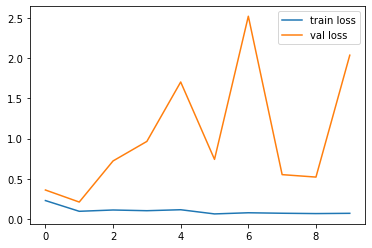

<Figure size 432x288 with 0 Axes>

In [70]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

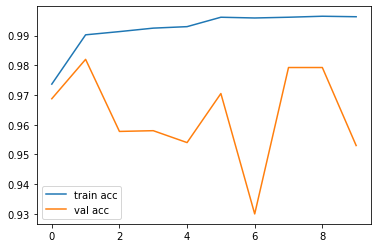

<Figure size 432x288 with 0 Axes>

In [71]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [73]:
#model.save(r'C:\Users\akumarpandey686\Downloads\trained_model\mobilenet.h5')

In [89]:
from keras.preprocessing import image

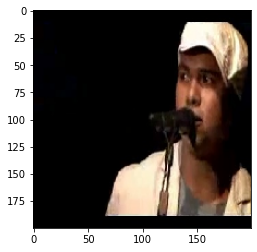

In [94]:
img = image.load_img(r'C:\Users\akumarpandey686\Downloads\data\just_tesing_data\nn (3).jpg',target_size=(200,200,3))
img = np.asarray(img)
plt.imshow(img)

In [95]:
img = np.expand_dims(img,axis=0)

In [97]:
output = model.predict(img)
if output[0][0] == 0:
    print('p')
else:
    print('np')

np


In [108]:
test = ImageDataGenerator(rescale = 1./255)
test_ = test.flow_from_directory(r'C:\Users\akumarpandey686\Downloads\data\just_tesing_data',
                                            target_size = (200, 200))

Found 26 images belonging to 2 classes.


In [109]:
pred = model.predict(test_)
for i in pred:
    print(i)

[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1.0000000e+00 2.5559999e-20]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1.0000000e+00 1.8737564e-37]
[1.0000000e+00 3.8101955e-38]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[9.9984717e-01 1.5285009e-04]
[9.999995e-01 5.120822e-07]
[1. 0.]
